In [1]:
%%time
#ID = '20181116_3'

import matplotlib.pyplot as plt
%matplotlib inline


version = 'runembryos'
pathlst = {
        'rawtif':'/Volumes/backup/tiff_ROK',
        'outline':'/Volumes/backup/tiff_outline',
        'manual_circles':'/Volumes/backup/tiff_ROK_manual_circles',
        'embryos':'/Volumes/backup/'+version+'/embryos.csv',
        'plots':'/Volumes/backup/'+version+'/plots',
        'data':'/Volumes/backup/'+version+'/data',
        'trajs':'/Volumes/backup/'+version+'/trajs'
        }

import numpy as np
import pandas as pd
import os
from os.path import join as pjoin



import tifffile
from skimage import io


videotmin = 100
infolst = pd.read_csv(pathlst['embryos'],skipinitialspace=True).set_index('ID')
IDs = [ID for ID in infolst.index if os.path.exists(pjoin(pathlst['manual_circles'], infolst.loc[ID]['phenotype']+'-'+ID+'.zip')) and int(infolst.loc[ID]['nEnd'])*float(infolst.loc[ID]['tRes'])>=videotmin]


CPU times: user 794 ms, sys: 248 ms, total: 1.04 s
Wall time: 1.14 s


In [2]:
infolst.loc[IDs]

,phenotype,LabelG,LabelR,tRes,nEnd,note,threshold
ID,,,,,,,
20181116_3,spd,ROK,NMY,0.4,500,TIRF,NaN
20181116_4,spd,ROK,NMY,0.4,650,TIRF,NaN
20181116_5,spd,ROK,NMY,0.4,900,TIRF,NaN
20181116_6,spd,ROK,NMY,0.4,350,TIRF,NaN
20190524_3,spd,ROK,LA,0.6,550,SD,NaN
20190524_4,spd,ROK,LA,0.6,300,SD,NaN
20190524_5,spd,ROK,LA,0.6,350,SD,NaN
20190524_6,spd,ROK,LA,0.6,250,SD,NaN
20190524_7,spd,ROK,LA,0.6,220,SD,NaN


In [3]:
phenotypes = ['spd','cyk','ani','pfn','nmy','cyk+nmy','ani+nmy']
IDs2 = [ID for ID in IDs if os.path.exists(pjoin(pathlst['data'],infolst.loc[ID]['phenotype']+'-'+ID+'.npy'))]
print(len(IDs2))



58


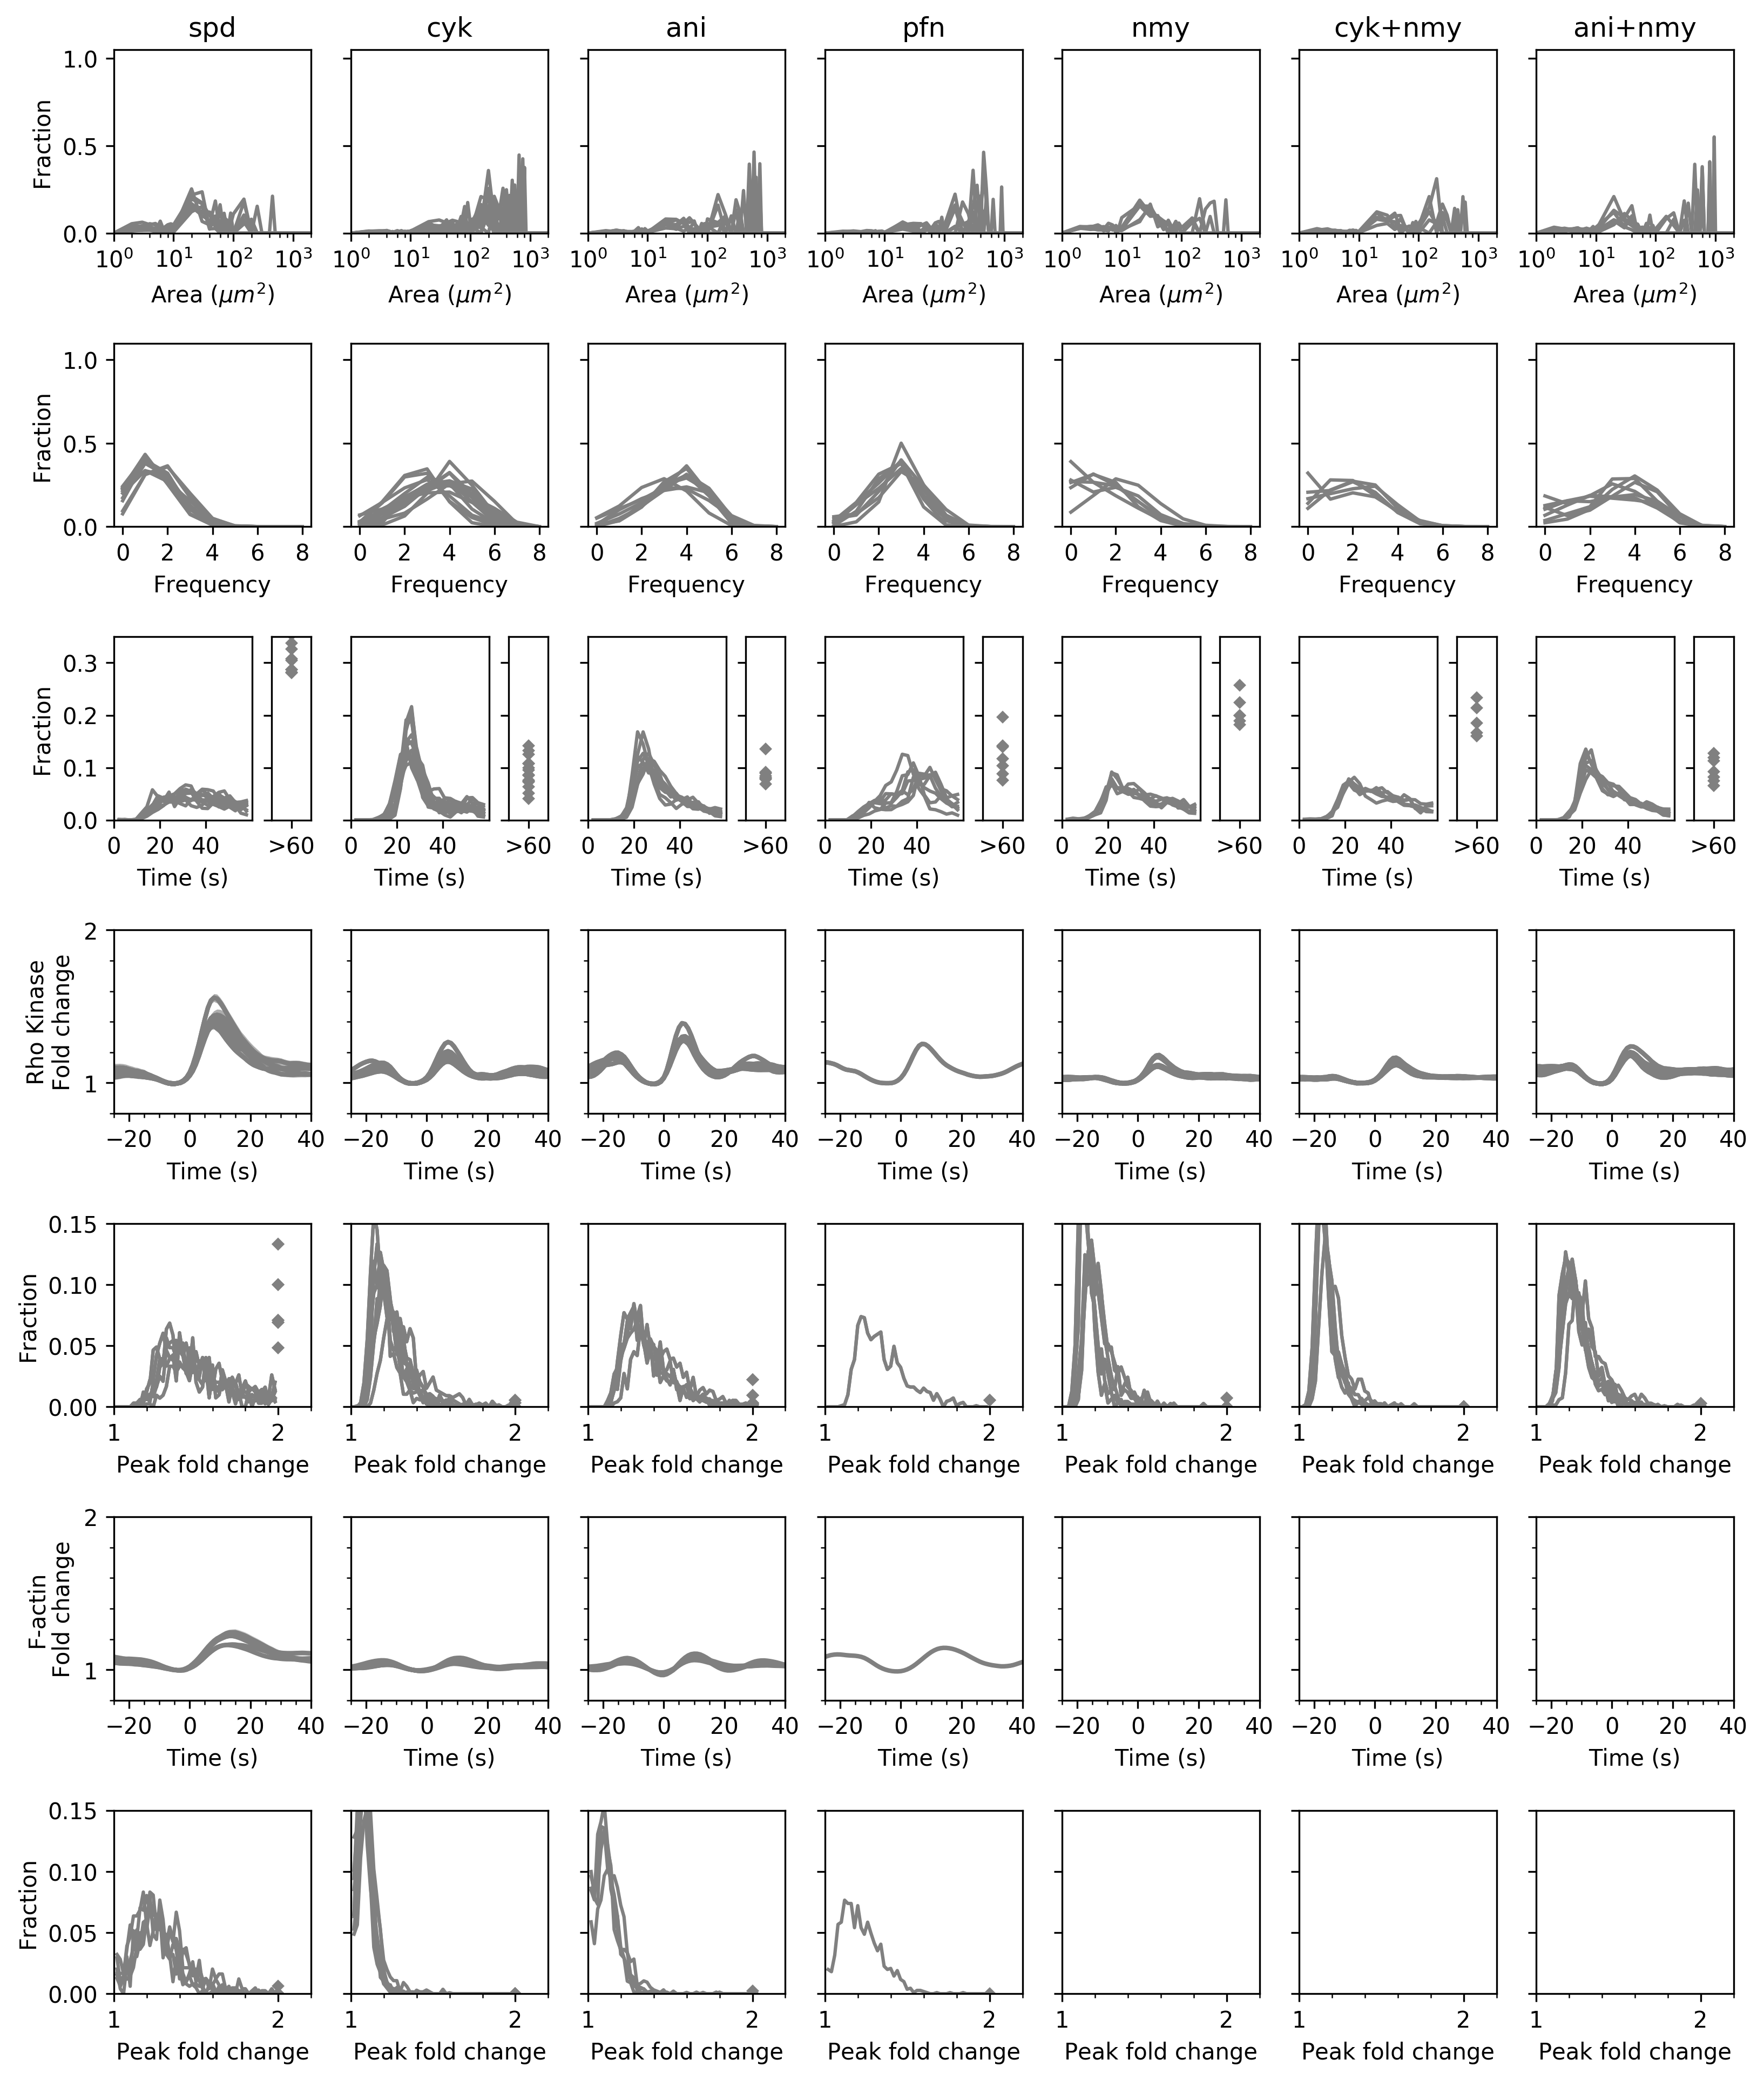

In [5]:
FW,FH = 15,15
fig = plt.figure(figsize=(FW,FH),dpi=300)

loc = {'L':0.75,'W':10,'T':0.7,'H':12}
axes = fig.subplots(ncols=len(phenotypes), nrows=7, sharex='row', sharey='row',
                    gridspec_kw={'left':loc['L']/FW, 'right':(loc['L']+loc['W'])/FW, 
                                'top':1-loc['T']/FH,'bottom':1-(loc['T']+loc['H'])/FH,
                                'wspace':0.2, 'hspace':0.6})

import matplotlib
iii = 0
for ax in axes[iii]:
    ax.set_xscale("log")
    locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=5)
    ax.xaxis.set_minor_locator(locmin)
    ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
    ax.set(xlim=[1,2000],xticks=[1,10,100,1000],xlabel='Area (${\mu}m^2$)')
    ax.set(ylim=[0,1.05],yticks=[0,0.5,1])
axes[iii,0].set(ylabel='Fraction')
for ii,phenotype in enumerate(phenotypes):
    axes[iii,ii].set_title(phenotype)

iii = 1
for ax in axes[iii]:
    ax.set(ylim=[0,1.1],xticks=[0,2,4,6,8],xlabel='Frequency')
axes[iii,0].set(ylabel='Fraction')

iii = 2
axes2 = []
for ax in axes[iii]:
    ax.set(ylim=[0,0.35],yticks=np.arange(0,0.5,0.1),
           xticks=[0,20,40],xlim=[0,60])
    ax.set(xlabel='Time (s)')
    box = ax.get_position()
    ax.set_position([box.x0, box.y0,(box.x1-box.x0)*0.7, box.y1-box.y0])

    ax2 = fig.add_axes([box.x0+(box.x1-box.x0)*0.8, box.y0, (box.x1-box.x0)*0.2, box.y1-box.y0])#[left, bottom, width, height]
    ax2.set(ylim=[0,0.35],yticks=np.arange(0,0.5,0.1),yticklabels=[],
            xlim=[55,65],xticks=[60],xticklabels=['>60'])
    axes2.append(ax2)
axes[iii,0].set(ylabel='Fraction')

iii = 3
for ax in axes[iii]:
    ax.set_yticks(np.arange(0,2,0.2), minor=True)
    ax.set(ylim=[0.8,2],yticks=[1,2])
    ax.set_xticks(np.arange(-25,50,5), minor=True)
    ax.set(xlim=[-25,40],xticks=[-20,0,20,40],xlabel='Time (s)')
axes[iii,0].set(ylabel='Rho Kinase\nFold change')

iii = 4
for ax in axes[iii]:
    ax.set_xticks(np.arange(0,2.5,0.2), minor=True)
    ax.set(xlim=[1,2.2],xticks=[1,2],ylim=[0,0.15])
    ax.set(xlabel='Peak fold change')
axes[iii,0].set(ylabel='Fraction')


iii = 5
for ax in axes[iii]:
    ax.set_yticks(np.arange(0,2,0.2), minor=True)
    ax.set(ylim=[0.8,2],yticks=[1,2])
    ax.set_xticks(np.arange(-25,50,5), minor=True)
    ax.set(xlim=[-25,40],xticks=[-20,0,20,40],xlabel='Time (s)')
axes[iii,0].set(ylabel='F-actin\nFold change')

iii = 6
for ax in axes[iii]:
    ax.set_xticks(np.arange(0,2.5,0.2), minor=True)
    ax.set(xlim=[1,2.2],xticks=[1,2],ylim=[0,0.15])
    ax.set(xlabel='Peak fold change')
axes[iii,0].set(ylabel='Fraction')

from kinetics import amp_distr
from spread import area_distr
from plot import mean_CI
from kinetics import ts_normalize
for ID in IDs2:
    data = np.load(pjoin(pathlst['data'],infolst.loc[ID]['phenotype']+'-'+ID+'.npy'),allow_pickle=True).item()
    phenotype = infolst.loc[ID]['phenotype']

    ii = phenotypes.index(phenotype)
    ax = axes[0,ii]
    alst,dlst,abins,asums = area_distr(data['trajad'])
    ax.plot(abins,asums/asums.sum(),'-',color='grey')#np.cumsum()

    ax = axes[1,ii]
    t,y = data['frequency']
    ax.plot(t,y,'-',color='grey')

    ax = axes[2,ii]
    t,y = data['wait']
    ax.plot(t[:-1],y[:-1],'grey')
    ax2 = axes2[ii]
    ax2.plot(t[-1],y[-1],'D',color='grey',ms='3')

    if 'SD' not in infolst.loc[ID]['note']:
        continue
    ax = axes[3,ii]
    tkinetics = np.arange(-30,60)
    akinetics = data['akinetics']
    akinetics2 = akinetics/ts_normalize(tkinetics,akinetics)
    
    mean,CI = mean_CI(akinetics2[:,:,0])
    ax.plot(tkinetics,mean,'-',color='grey',lw=2)
    ax.fill_between(tkinetics,mean-CI,mean+CI,color='grey',alpha=0.4,lw=0)

    ax = axes[4,ii]
    _,(t,y) = amp_distr(akinetics2[:,:,0],tkinetics,MIN=1,MAX=2)
    ax.plot(t[:-1],y[:-1],'-',color='grey')
    ax.plot(t[-1],y[-1],'D',color='grey',ms='3')
    
    if 'SD' not in infolst.loc[ID]['note']:
        continue
    ax = axes[3,ii]
    tkinetics = np.arange(-30,60)
    akinetics = data['akinetics']
    akinetics2 = akinetics/ts_normalize(tkinetics,akinetics)
    
    mean,CI = mean_CI(akinetics2[:,:,0])
    ax.plot(tkinetics,mean,'-',color='grey',lw=2)
    ax.fill_between(tkinetics,mean-CI,mean+CI,color='grey',alpha=0.4,lw=0)

    ax = axes[4,ii]
    _,(t,y) = amp_distr(akinetics2[:,:,0],tkinetics,MIN=1,MAX=2)
    ax.plot(t[:-1],y[:-1],'-',color='grey')
    ax.plot(t[-1],y[-1],'D',color='grey',ms='3')

    if 'LA' not in infolst.loc[ID]['LabelR']:
        continue
    ax = axes[5,ii]
    mean,CI = mean_CI(akinetics2[:,:,1])
    ax.plot(tkinetics,mean,'-',color='grey',lw=2)
    ax.fill_between(tkinetics,mean-CI,mean+CI,color='grey',alpha=0.4,lw=0)

    ax = axes[6,ii]
    _,(t,y) = amp_distr(akinetics2[:,:,1],tkinetics,MIN=1,MAX=2)
    ax.plot(t[:-1],y[:-1],'-',color='grey')
    ax.plot(t[-1],y[-1],'D',color='grey',ms='3')
fig.savefig(pjoin(pathlst['plots'],'summary_periodicity.pdf'), format='pdf', transparent=True, rasterized=True)


In [6]:
akinetics.shape

(836, 90, 2)

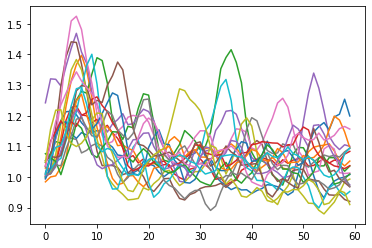

In [25]:
mask = 0<=tkinetics
for i in range(20):
    plt.plot(tkinetics[mask],akinetics2[i,mask,0])

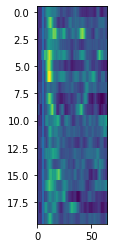

In [63]:
mask = -5<=tkinetics
plt.imshow(akinetics2[:20,mask,1],aspect=10)
plt.axvline(5)

In [57]:
amp,(t,y) = amp_distr(akinetics2[:,:,1],tkinetics,MIN=1,MAX=2)


In [58]:
idxes = np.arange(0,akinetics2.shape[0],40)
idxes

array([  0,  40,  80, 120, 160, 200, 240, 280, 320, 360, 400, 440, 480,
       520, 560, 600, 640, 680, 720, 760, 800])

In [54]:
amp.shape

(21,)

In [55]:
akinetics2[idxes].shape

(21, 90, 2)

In [69]:
for ID in IDs2:
    data = np.load(pjoin(pathlst['data'],infolst.loc[ID]['phenotype']+'-'+ID+'.npy'),allow_pickle=True).item()
    phenotype = infolst.loc[ID]['phenotype']

    if 'SD' not in infolst.loc[ID]['note']:
        continue
    ax = axes[3,ii]
    tkinetics = np.arange(-30,60)
    akinetics = data['akinetics']
    akinetics2 = akinetics/ts_normalize(tkinetics,akinetics)
    
    tifffile.imsave(pjoin(pathlst['plots'],'kinetics',phenotype+'-'+ID+'.tif'),np.swapaxes(np.swapaxes(akinetics2,0,2),1,2).astype(np.float32))   
    
    
    

In [65]:
akinetics2.min(),akinetics2.max()

(0.8102752859756231, 1.929245182944164)

In [67]:
().shape

(2, 90, 836)

In [7]:
akinetics2

In [ ]:
#phenotypes = ['spd','cyk','ani','pfn']
phenotypes = ['nmy','cyk+nmy','ani+nmy']

fig, axes = plt.subplots(4,2,figsize=(6,12), sharex='none', sharey='none', dpi=100)

color = np.array([249,166,31])/255

from utils import mean_CI
for i,phenotype in enumerate(phenotypes):
    print(phenotype, end =" ")
    axes[i,0].set_title(phenotype)
    
    arrlst = []
    IDs = es2[es2['phenotype']==phenotype].index
    for ID in IDs:
        axes[i,0].plot(bins,arr)
        arrlst.append(arr)
    mean,CI = mean_CI(np.vstack(arrlst))
    axes[i,1].plot(bins,mean,'-o',color=color,lw=2)
    axes[i,1].fill_between(bins,mean-CI,mean+CI,color=color,alpha=0.4,lw=0)


In [12]:
data = np.load(pjoin(pathlst['data'],'ani-20190729_11_ws.npy'),allow_pickle=True).item()
print(data.keys())
globals().update(data)



dict_keys(['temp', 'outline', 'outlinexy', 'img', 'y', 'ys', 'ybc', 'IMG', 'IMGSM', 'IMGD', 'imr', 'mcircles', 'tkinetics', 'mkinetics', 'threshlst', 'THRESH', 'IMGM', 'onx', 'ony', 'nzzs', 'EXC', 'imshape', 'NEWEXC', 'cumnewexc', 'points', 'acircles', 'akinetics', 'NCUT', 'newexcsum', 'frequency', 'wait', 'cntdict', 'polydict', 'graph', 'trajs', 'trajps', 'trajad', 'data', 'ID', 'phenotype', 'LabelR', 'nEnd', 'tRes', 'videotmin', 'pathlst'])
